In [36]:
import numpy as np
import scipy.optimize

E = 8200.0
alpha = 17.8e-6
p = 0.548 # kgf/m

s = 147.1 # mm2 
t_1 = 9.38 # kgf/mm2
T_1 = t_1 * s
a = 275 # m

q_1 = -15.0
q_2 =  65.0

def F(x):
    
    
    T_2 = x
    
    L_1 = a*(1 + a**2*p**2/(24*T_1**2))
    L_2 = a*(1 + a**2*p**2/(24*T_2**2))
    
    Dlm = (T_2 - T_1)/(s*E)
    Dlq = L_1*(q_2 - q_1)*alpha
    
    Dl = L_2 - L_1
    
    return Dl - Dlm - Dlq 

T_2_0 = T_1
x = scipy.optimize.broyden1(F, [T_1], f_tol=1e-8)

T_2 = x 
print('T_1 = {:2.1f} kgf -> T_2 = {:2.1f} kgf'.format(T_1, T_2[0]) )


T_1 = 1379.8 kgf -> T_2 = 702.1 kgf


In [39]:
T_0 = T_1
flecha_1 = p*a**2/(8*T_0)

T_0 = T_2[0]
flecha_2 = p*a**2/(8*T_0)

print('flecha_1 = {:2.1f} m -> flecha_2 = {:2.1f} m'.format(flecha_1, flecha_2) )



flecha_1 = 3.8 m -> flecha_2 = 7.4 m


In [38]:
T_2[0]

702.08765494518764

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


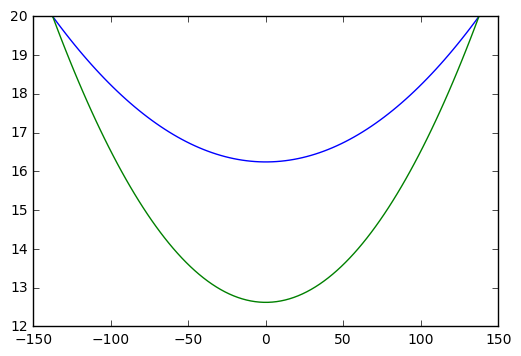

In [44]:
x = np.linspace(-a/2,a/2,100)

T_0 = T_1
y_1 = (T_0/p + p/2*x**2/T_0) 

T_0 = T_2
y_2 = (T_0/p + p/2*x**2/T_0) 

fig, (ax0) = plt.subplots(nrows=1)   # creates a figure with one axe

H = 20.0
ax0.plot(x,y_1-y_1[0]+H) 
ax0.plot(x,y_2-y_2[0]+H) 
fig.show()